# Import libraries and sql data

In [1]:
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import time
import matplotlib.pyplot as plt

In [2]:
result = load_dotenv('env.env')

if result:
    print(".env file loaded successfully.")
else:
    print(".env file not found or couldn't be loaded.")

db_host = str(os.getenv('DB_HOST'))
db_password = str(os.getenv('DB_PASSWORD'))
db_schema = str(os.getenv('DB_SCHEMA'))

print("DB Host:", db_host)
print("DB Password:", db_password)
print("DB Schema:", db_schema)

engine_path = 'mysql+pymysql://root:' + db_password + '@' + db_host + '/' + db_schema

.env file loaded successfully.
DB Host: localhost
DB Password: #S4N4four.O
DB Schema: mco1


In [3]:
engine = create_engine(engine_path)

In [4]:
connection = engine.connect()

In [5]:
query = "SELECT * FROM mco1.doctors"
start_time = time.time()
df = pd.read_sql_query(query, connection)
elapsed_time = time.time() - start_time

print(df)
print(f"Time taken to fetch data: {elapsed_time} seconds")

                               doctorid              mainspecialty  age
0      00003E3B9E5336685200AE85D21B4F5E          Internal Medicine   37
1      0002AC0D783338CFEAB0B2BDBD872CDA          General Physician   29
2      0004D0B59E19461FF126E3A08A814C33  Obstetrics and Gynecology   51
3      00053F5E11D1FE4E49A221165B39ABC9          Internal Medicine   42
4      0007789B118E4710FC0E7C8758A6532A                Dermatology   35
...                                 ...                        ...  ...
15371  FFEC39090FA0C85692730FDBD647E34D                    Surgery   33
15372  FFEED84C7CB1AE7BF4EC4BD78275BB98          Internal Medicine   45
15373  FFF375790D1D509387E4F04A68FC401C       General Practitioner   27
15374  FFFCC1A3964B4AD665FA2F07D7BFD086       General Practitioner   31
15375  FFFFFE98D0963D27015C198262D97221           General Medicine   29

[15376 rows x 3 columns]
Time taken to fetch data: 0.20734906196594238 seconds


# Roll-Up: Count of appointments per region, province, city

In [6]:
query = """
    SELECT
        c.RegionName,
        c.Province,
        c.City,
        COUNT(*) AS appointment_count
    FROM appointments a
    JOIN clinics c ON a.clinicid = c.clinicid
    GROUP BY c.RegionName, c.Province, c.City WITH ROLLUP;
"""
start_time = time.time()
OLAP_Query_1 = pd.read_sql_query(query, connection)
elapsed_time = time.time() - start_time

print(OLAP_Query_1.head(50))
print(f"Time taken to fetch data: {elapsed_time} seconds")

                              RegionName         Province             City  \
0                       Bicol Region (V)            Albay     Legazpi City   
1                       Bicol Region (V)            Albay           Manito   
2                       Bicol Region (V)            Albay             None   
3                       Bicol Region (V)             None             None   
4                      CALABARZON (IV-A)           Cavite      Bacoor City   
5                      CALABARZON (IV-A)           Cavite  Dasmariñas City   
6                      CALABARZON (IV-A)           Cavite             None   
7                      CALABARZON (IV-A)           Laguna     Calamba City   
8                      CALABARZON (IV-A)           Laguna  Santa Rosa City   
9                      CALABARZON (IV-A)           Laguna             None   
10                     CALABARZON (IV-A)             None             None   
11                   Central Luzon (III)          Bulacan     Ma

In [7]:
OLAP_Query_1

,RegionName,Province,City,appointment_count
0,Bicol Region (V),Albay,Legazpi City,1
1,Bicol Region (V),Albay,Manito,186
2,Bicol Region (V),Albay,None,187
3,Bicol Region (V),None,None,187
4,CALABARZON (IV-A),Cavite,Bacoor City,31
5,CALABARZON (IV-A),Cavite,Dasmariñas City,64
6,CALABARZON (IV-A),Cavite,None,95
7,CALABARZON (IV-A),Laguna,Calamba City,1394
8,CALABARZON (IV-A),Laguna,Santa Rosa City,342
9,CALABARZON (IV-A),Laguna,None,1736


In [8]:
OLAP_Query_1['Index'] = OLAP_Query_1['RegionName'] + ', ' + OLAP_Query_1['Province'].fillna('') + ', ' + OLAP_Query_1['City'].fillna('')

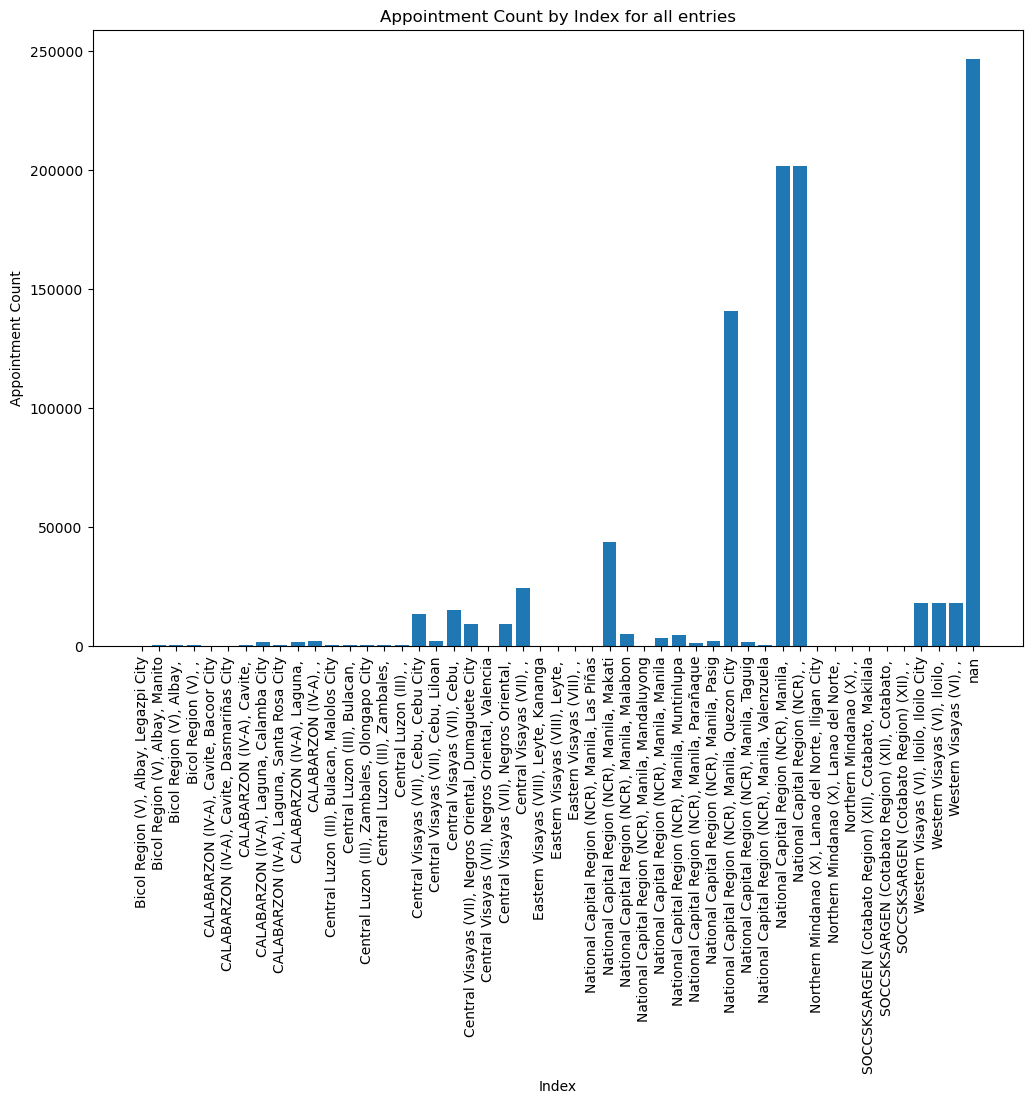

In [9]:
plt.figure(figsize=(12, 8))
plt.bar(range(len(OLAP_Query_1)), OLAP_Query_1['appointment_count'])
plt.xticks(range(len(OLAP_Query_1)), OLAP_Query_1['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for all entries')
plt.show()

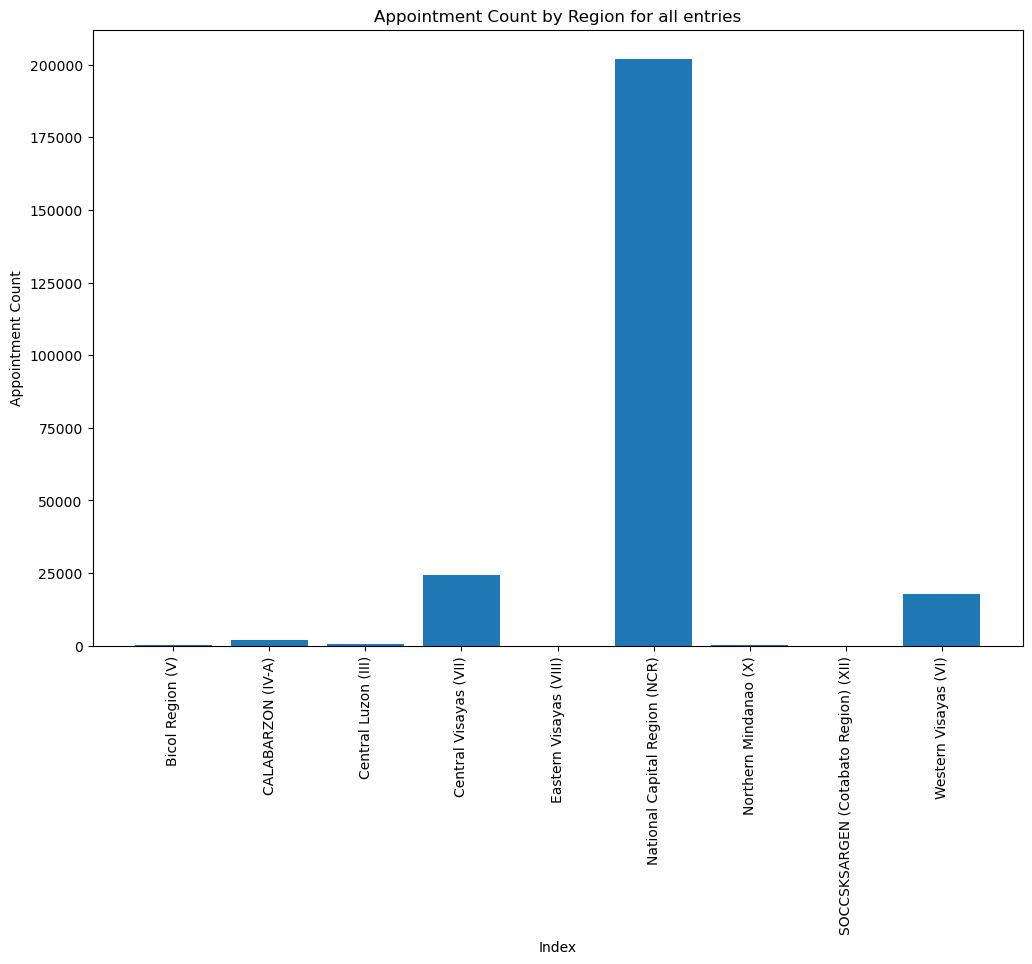

In [10]:
filtered_data = OLAP_Query_1[OLAP_Query_1['Province'].isnull()]
filtered_data = filtered_data[filtered_data['RegionName'].notnull()]

plt.figure(figsize=(12, 8))
plt.bar(range(len(filtered_data)), filtered_data['appointment_count'])
plt.xticks(range(len(filtered_data)), filtered_data['RegionName'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Region for all entries')
plt.show()

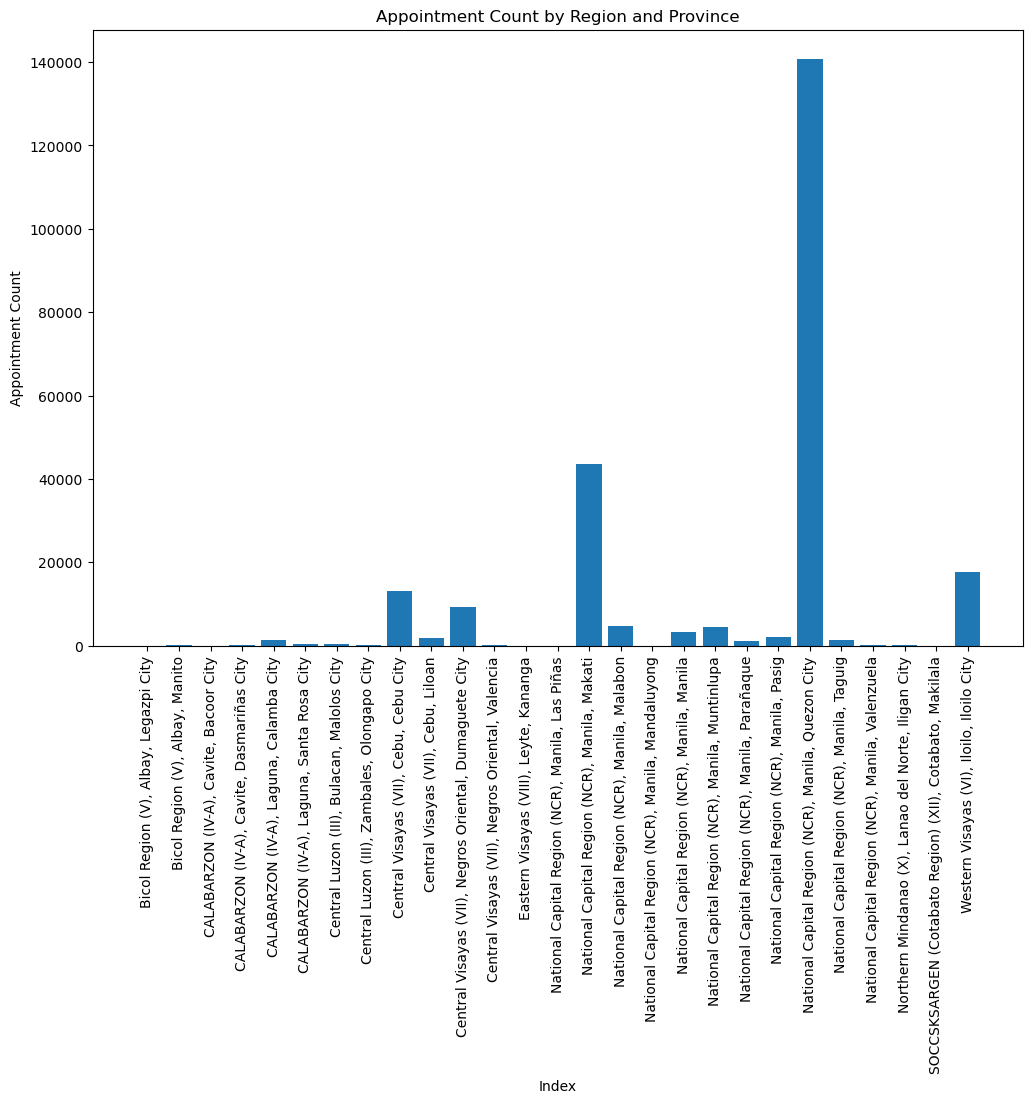

In [11]:
filtered_data = OLAP_Query_1[OLAP_Query_1['City'].notnull()]

plt.figure(figsize=(12, 8))
plt.bar(range(len(filtered_data)), filtered_data['appointment_count'])
plt.xticks(range(len(filtered_data)), filtered_data['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Region and Province')
plt.show()

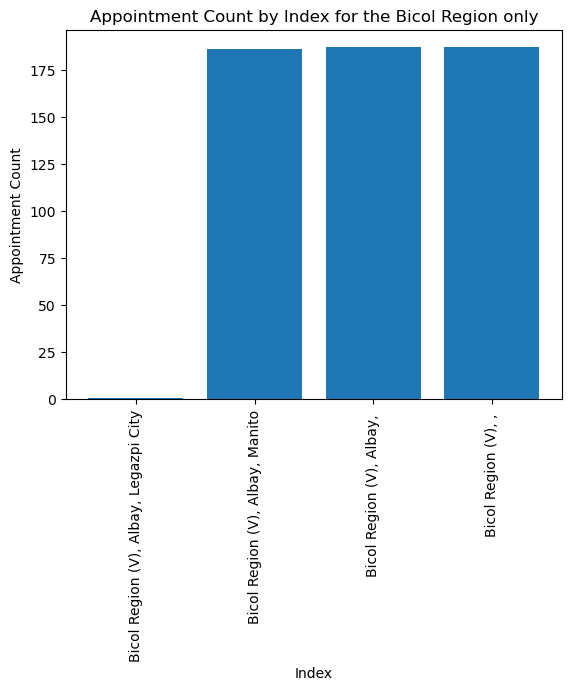

In [12]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Bicol Region (V)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for the Bicol Region only')
plt.show()

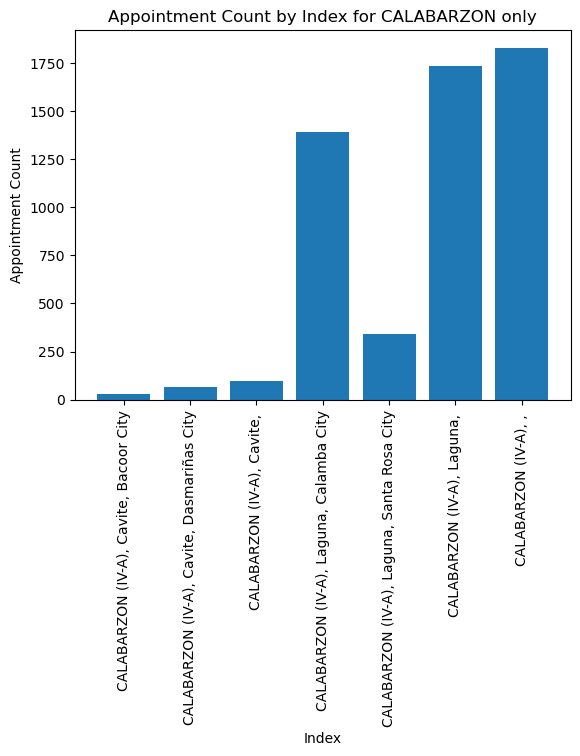

In [13]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'CALABARZON (IV-A)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for CALABARZON only')
plt.show()

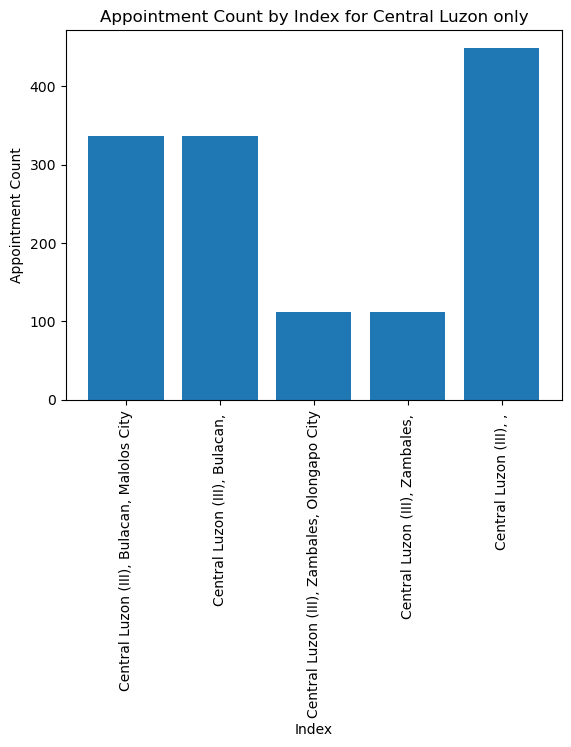

In [14]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Central Luzon (III)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Central Luzon only')
plt.show()

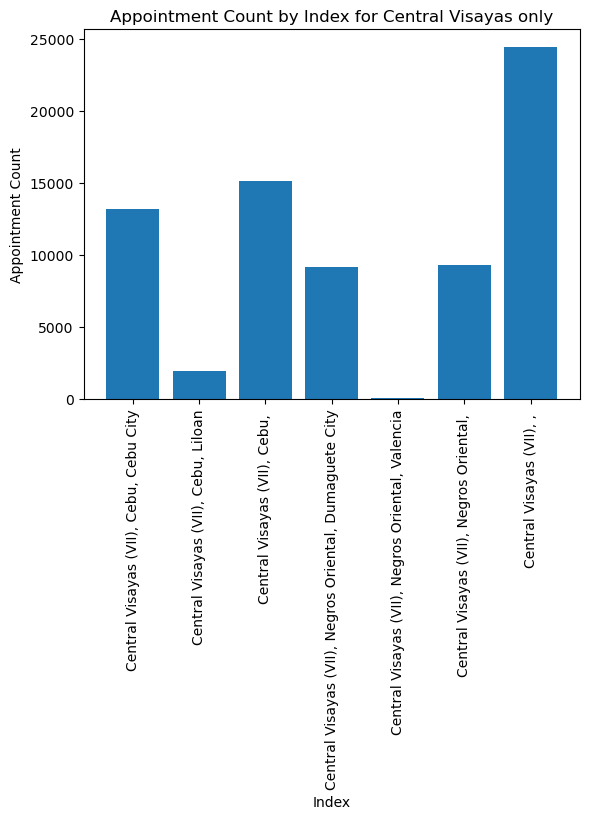

In [15]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Central Visayas (VII)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Central Visayas only')
plt.show()

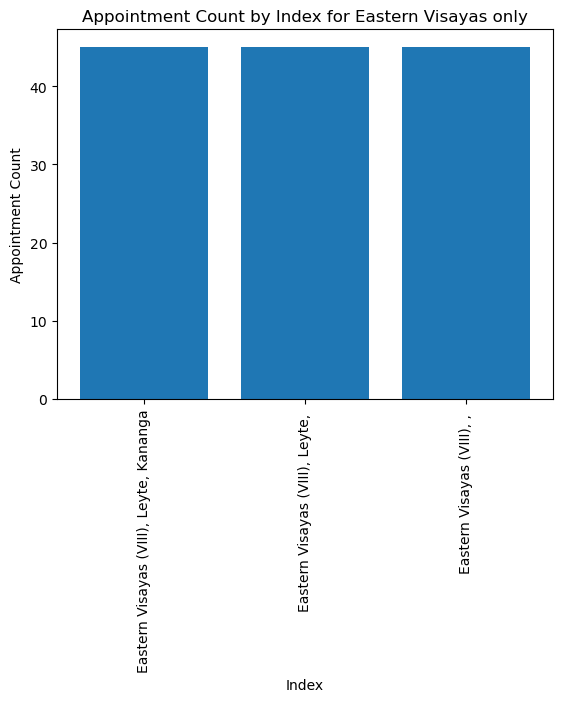

In [16]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Eastern Visayas (VIII)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Eastern Visayas only')
plt.show()

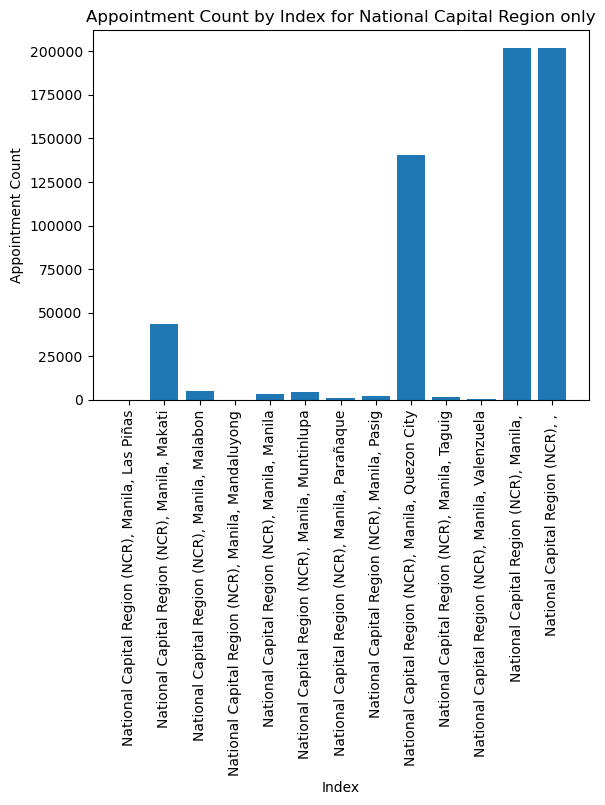

In [17]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'National Capital Region (NCR)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for National Capital Region only')
plt.show()

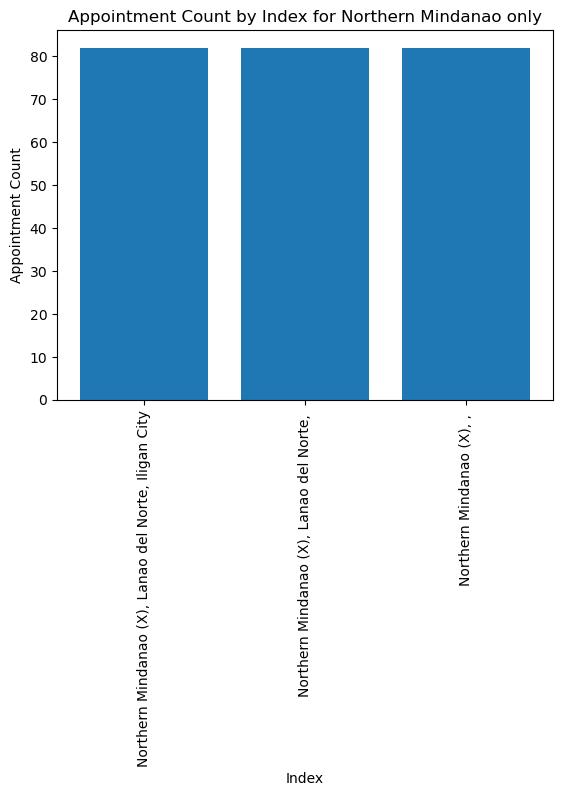

In [18]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Northern Mindanao (X)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Northern Mindanao only')
plt.show()

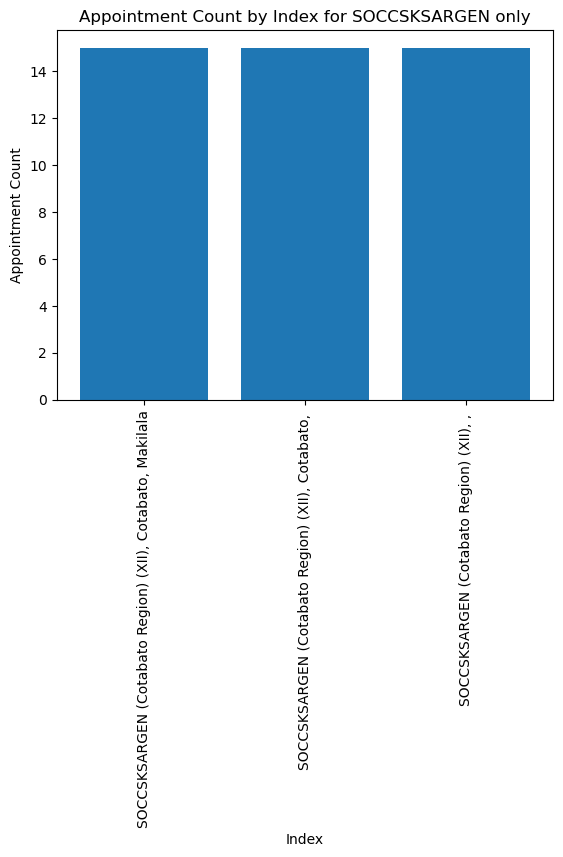

In [19]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'SOCCSKSARGEN (Cotabato Region) (XII)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for SOCCSKSARGEN only')
plt.show()

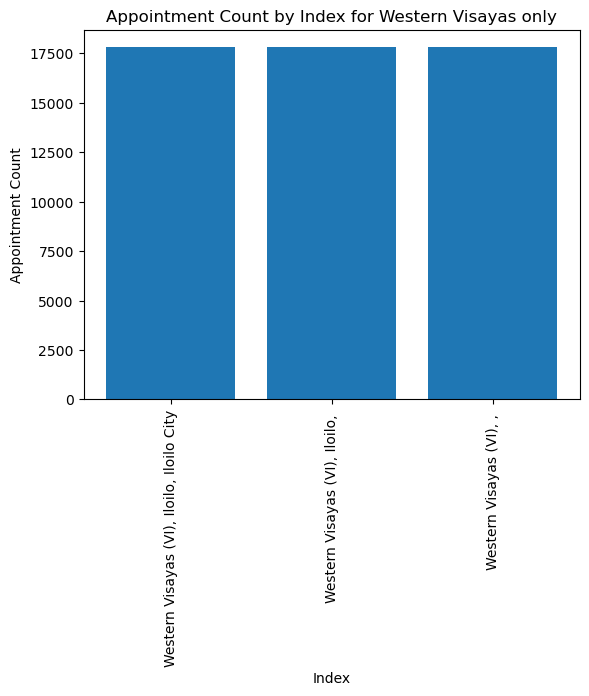

In [20]:
Query_Subtable = OLAP_Query_1[OLAP_Query_1['RegionName'] == 'Western Visayas (VI)']
Query_Subtable
plt.bar(range(len(Query_Subtable)), Query_Subtable['appointment_count'])
plt.xticks(range(len(Query_Subtable)), Query_Subtable['Index'], rotation=90)
plt.xlabel('Index')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index for Western Visayas only')
plt.show()

# Slice: Count of appointments per given specific location/within a time period

In [21]:
query = """
    SELECT
    d.mainspecialty AS specialty,
    COUNT(*) AS total_appointments
FROM
    appointments a
    JOIN doctors d ON d.doctorid = a.doctorid
GROUP BY d.mainspecialty;
"""
start_time = time.time()
OLAP_Query_2 = pd.read_sql_query(query, connection)
elapsed_time = time.time() - start_time

print(OLAP_Query_2.head(50))
print(f"Time taken to fetch data: {elapsed_time} seconds")

                   specialty  total_appointments
0          Internal Medicine               34739
1            Family Medicine                9184
2                    Surgery              145823
3                Dermatology               49462
4  Obstetrics and Gynecology                7149
5           General Medicine                 396
Time taken to fetch data: 0.8653526306152344 seconds


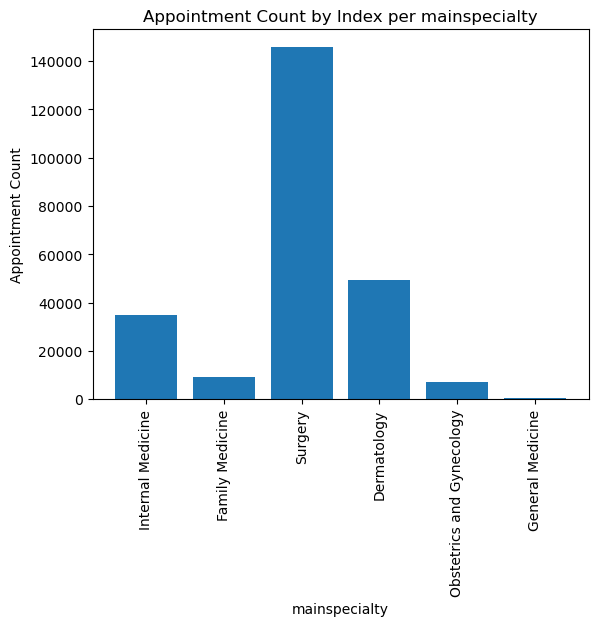

In [22]:
plt.bar(range(len(OLAP_Query_2)), OLAP_Query_2['total_appointments'])
plt.xticks(range(len(OLAP_Query_2)), OLAP_Query_2['specialty'], rotation=90)
plt.xlabel('mainspecialty')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Index per mainspecialty')
plt.show()

In [23]:
OLAP_Query_2

,specialty,total_appointments
0,Internal Medicine,34739
1,Family Medicine,9184
2,Surgery,145823
3,Dermatology,49462
4,Obstetrics and Gynecology,7149
5,General Medicine,396


# Drill Down: Count of appointments per region to city per main specialty

In [24]:
query = """
    SELECT 
    YEAR(a.QueueDate) AS Year,
    MONTHNAME(a.QueueDate) AS Month_name,
    DAYNAME(a.QueueDate) AS Day_of_Month,
    ROUND(AVG(p.age)) AS AverageAge,
    COUNT(DISTINCT a.pxid) AS Num_of_Patients
FROM appointments a
JOIN doctors d ON a.doctorid = d.doctorid
JOIN clinics c ON a.clinicid = c.clinicid
JOIN px p ON a.pxid = p.pxid
WHERE YEAR(QueueDate) >= 2018
GROUP BY Year, MONTH(a.QueueDate), Month_name, Day_of_Month
ORDER BY Year, MONTH(a.QueueDate), FIELD(Day_of_Month, 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday');

"""
start_time = time.time()
OLAP_Query_3 = pd.read_sql_query(query, connection)
elapsed_time = time.time() - start_time

print(OLAP_Query_3.head(50))
print(f"Time taken to fetch data: {elapsed_time} seconds")

    Year Month_name Day_of_Month  AverageAge  Num_of_Patients
0   2018    January       Monday        53.0              290
1   2018    January      Tuesday        51.0              219
2   2018    January    Wednesday        52.0              222
3   2018    January     Thursday        52.0              181
4   2018    January       Friday        51.0              219
5   2018    January     Saturday        52.0              170
6   2018    January       Sunday        51.0              149
7   2018   February       Monday        51.0              199
8   2018   February      Tuesday        51.0              199
9   2018   February    Wednesday        51.0              159
10  2018   February     Thursday        53.0              174
11  2018   February       Friday        50.0              229
12  2018   February     Saturday        51.0              228
13  2018   February       Sunday        51.0              309
14  2018      March       Monday        53.0              235
15  2018

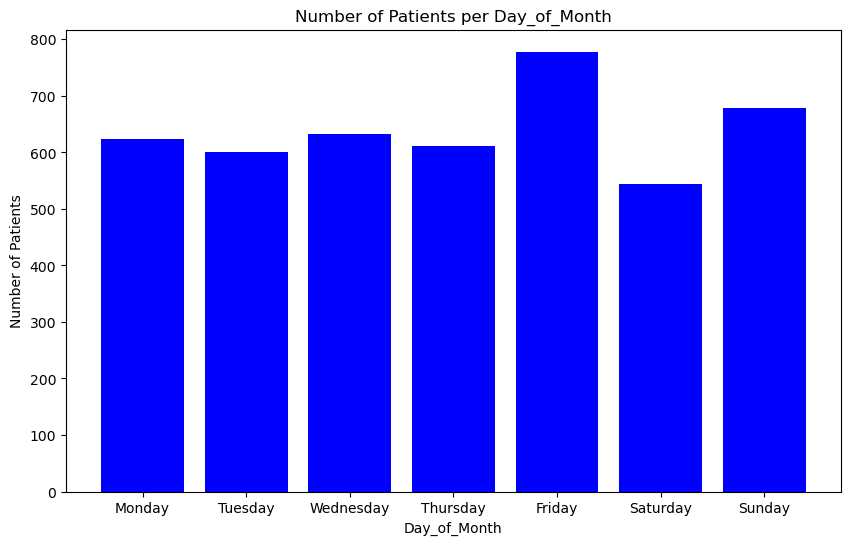

In [25]:
# Bar graph for Num_of_Patients per Day_of_Month
plt.figure(figsize=(10, 6))
plt.bar(OLAP_Query_3['Day_of_Month'], OLAP_Query_3['Num_of_Patients'], color='blue')
plt.xlabel('Day_of_Month')
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Day_of_Month')
plt.show()

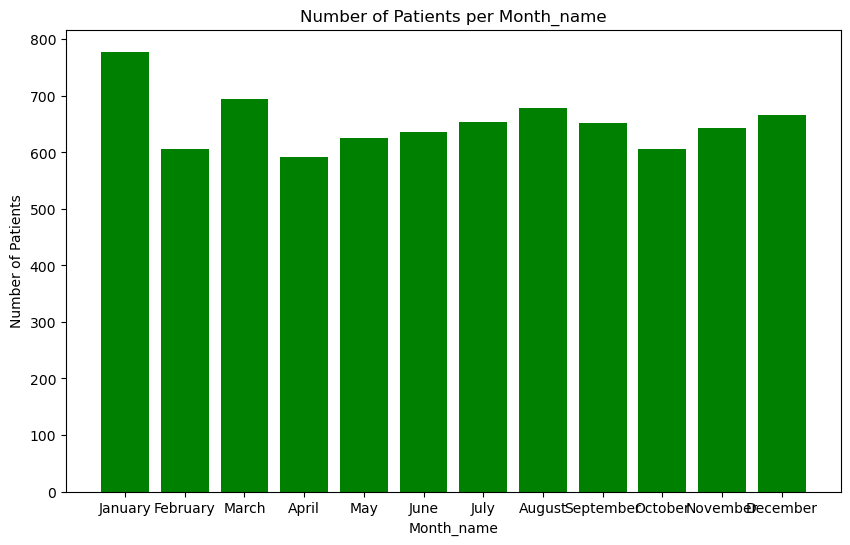

In [26]:
# Bar graph for Num_of_Patients per Month_name
plt.figure(figsize=(10, 6))
plt.bar(OLAP_Query_3['Month_name'], OLAP_Query_3['Num_of_Patients'], color='green')
plt.xlabel('Month_name')
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Month_name')
plt.show()

# Dice:  Total number of appointments for male and female patients 60 and above per doctor's main specialty

In [27]:
query = """
    SELECT
    YEAR(a.QueueDate) as Year,
    px.gender,
    d.mainspecialty,
    COUNT(*) AS appointment_count
FROM appointments a
JOIN px ON a.pxid = px.pxid
JOIN doctors d ON a.doctorid = d.doctorid
WHERE (d.mainspecialty = "General Medicine" OR d.mainspecialty = "Surgery")
AND px.age >= 60
GROUP BY YEAR(a.QueueDate), px.gender, d.mainspecialty
ORDER BY YEAR(a.QueueDate), appointment_count DESC;

"""
start_time = time.time()
OLAP_Query_4 = pd.read_sql_query(query, connection)
elapsed_time = time.time() - start_time

print(OLAP_Query_4.head(50))
print(f"Time taken to fetch data: {elapsed_time} seconds")

    Year  gender     mainspecialty  appointment_count
0   2019    MALE  General Medicine                 65
1   2019  FEMALE  General Medicine                  3
2   2020  FEMALE           Surgery                 79
3   2020    MALE           Surgery                 71
4   2020    MALE  General Medicine                  1
5   2021  FEMALE           Surgery                 84
6   2021    MALE           Surgery                 56
7   2021    MALE  General Medicine                  2
8   2022  FEMALE           Surgery                 94
9   2022    MALE           Surgery                 31
10  2023  FEMALE           Surgery                281
11  2023    MALE           Surgery                 74
12  2024  FEMALE           Surgery                 20
13  2024    MALE           Surgery                 13
Time taken to fetch data: 0.6092319488525391 seconds


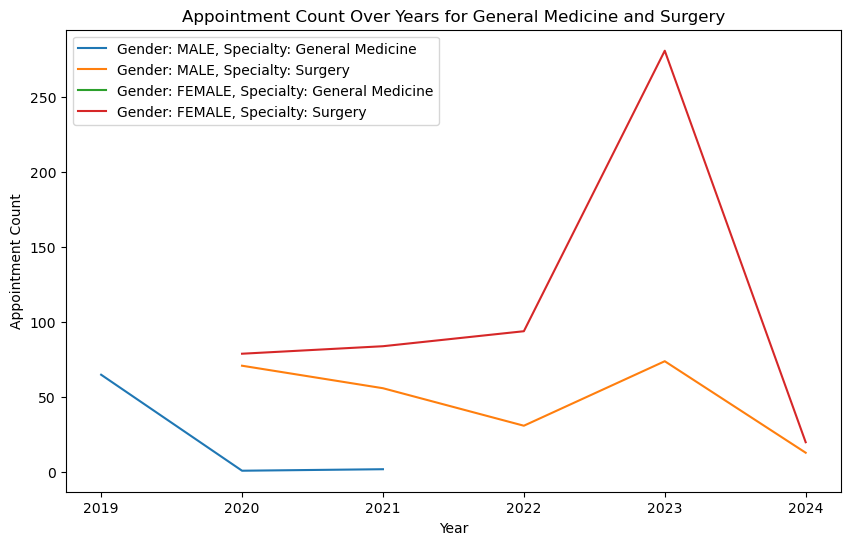

In [28]:
    # Create a line graph using matplotlib
    fig, ax = plt.subplots(figsize=(10, 6))

    # Iterate over unique gender and mainspecialty combinations
    for gender in OLAP_Query_4['gender'].unique():
        for mainspecialty in OLAP_Query_4['mainspecialty'].unique():
            subset = OLAP_Query_4[(OLAP_Query_4['gender'] == gender) & (OLAP_Query_4['mainspecialty'] == mainspecialty)]
            label = f'Gender: {gender}, Specialty: {mainspecialty}'
            ax.plot(subset['Year'], subset['appointment_count'], label=label)

    # Set plot labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Appointment Count')
    ax.set_title('Appointment Count Over Years for General Medicine and Surgery')

    # Add legend
    ax.legend()

    # Display the plot
    plt.show()

In [29]:
appointments.shape

NameError: name 'appointments' is not defined